In [1]:
#import required packages/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.charts as bc
import bokeh.plotting as bk
import os
from bokeh.charts import Bar, output_notebook, show, Scatter
from bokeh.io import output_file, show
from bokeh.plotting import figure 

In [2]:
#Import dataset downloaded from 'https://www.kaggle.com/c/zillow-prize-1/data'
properties=pd.read_csv("Data/properties_2016.csv",low_memory=False)
train=pd.read_csv("Data/train_2016_v2.csv")

In [3]:
#Check if a directory exists in the path or not;if not create one
def dir(file_path,directory_name):
    if not os.path.exists(file_path+"/"+directory_name):
        os.mkdir(file_path+"/"+directory_name)
    return file_path+"/"+directory_name

In [4]:
#Get path to current working directory
current_directory = os.getcwd()
#print(current_directory)
#Create Output directory to store output files
output_path=dir(current_directory,"Output")

In [5]:
#Analysis 1 on train datset
#Plotting a scatter plot to underestand the distribution on values for logerror
bk.output_notebook()
plot = figure(plot_width=600,plot_height=200,tools ='pan,box_zoom')
s = pd.Series(range(train.shape[0]),name='index')
dataf = pd.DataFrame(s)
dataf["logerror"]= np.sort(train.logerror.values)
p = Scatter(dataf,x="index",y="logerror",xlabel="Row Number",ylabel="Value of Logerror ")
#Save the plot in Output folder
output_file("Output/Logerror_ScatterPlot.html")
bk.show(p)

Loading BokehJS ...

In [6]:
#Removing outliers by droping observations with logerror >= -2.5 or logerror <= 3
train = train[train.logerror <=3]
train = train[train.logerror >=-2.5]

In [7]:
#Analysis 2 on train datset
#Plotting the frequency of transaction for each month
train['transactiondate']=pd.to_datetime(train['transactiondate'],format= '%Y-%m-%d')
q=train['transactiondate'].dt.month.value_counts()
df=pd.DataFrame(q)
p = Bar(df, 'index', values='transactiondate', title="Frequerncy of Transactions over the Months ",
                     xlabel="Month Number",ylabel="Frequency/Count",bar_width=0.3,color='wheat')
p.legend.visible= False
#Save the plot in Output folder
output_file("Output/TransactionFrequency.html")
bk.show(p)

C:\Users\prith\Anaconda3\lib\site-packages\bokeh\core\json_encoder.py:73: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if pd and isinstance(obj, pd.tslib.Timestamp):


In [8]:
#Analysis 3 on properties dataset
#Manual overview revieled that the dataset has null values for many variables.
#Get the exact count of null values for each variable
properties.isnull().sum().reset_index()

,index,0
0,parcelid,0
1,airconditioningtypeid,2173698
2,architecturalstyletypeid,2979156
3,basementsqft,2983589
4,bathroomcnt,11462
5,bedroomcnt,11450
6,buildingclasstypeid,2972588
7,buildingqualitytypeid,1046729
8,calculatedbathnbr,128912
9,decktypeid,2968121


In [9]:
#Calculate the percentage of null values for each variable
df1=properties.isnull().sum().reset_index()
df1.columns=['column_name', 'missing_Percentage']
c=properties.parcelid.count()
for i,v in df1.missing_Percentage.iteritems():
    df1.missing_Percentage[i]=(v*100)/c
df1

C:\Users\prith\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,column_name,missing_Percentage
0,parcelid,0
1,airconditioningtypeid,72
2,architecturalstyletypeid,99
3,basementsqft,99
4,bathroomcnt,0
5,bedroomcnt,0
6,buildingclasstypeid,99
7,buildingqualitytypeid,35
8,calculatedbathnbr,4
9,decktypeid,99


In [10]:
#Plot all 'Variables' and the respective 'Percentage of Null Values' using a bokeh chart
#p = figure(plot_width=2000,plot_height=600)
p = Bar(df1, 'column_name', values='missing_Percentage', title="Frequerncy of Transactions over the Months ",
                     xlabel="Month Number",ylabel="Frequency/Count",bar_width=0.3,color='cornflowerblue')
p.legend.visible= False
#Save the plot in Output folder
output_file("Output/Variable_Vs_NullPercentage.html")
bc.show(p)

In [11]:
#Drop variable having Percentage of null values > 60%
for the_key, the_value in df1.missing_Percentage.iteritems():
    if the_value>=60:
#          del properties[the_key]
           del properties[str(df1.column_name[the_key])]

In [12]:
#Merging data based on Parcel_id
merged_data=pd.merge(properties,train,on='parcelid',how='left')
#From the data description we understand that properties_2016 has the complete data from 1/1/2016 to 10/15/2016
#and partial data for rest of the year. Hence droping observations after 10/14/2016
merged_data=merged_data[merged_data.transactiondate < '2016-10-15']
merged_data.shape

(85652, 31)

In [13]:
#Out of 60 variables in total we have narrowed down to 31 variables
#Out of these variables,data description mentions that 'structuretaxvaluedollarcnt'
#reviels the 'The assessed value of the built structure on the parcel'
merged_data.structuretaxvaluedollarcnt.describe()

count    8.527400e+04
mean     1.803548e+05
std      2.081586e+05
min      1.000000e+02
25%      8.151700e+04
50%      1.324340e+05
75%      2.110445e+05
max      9.948100e+06
Name: structuretaxvaluedollarcnt, dtype: float64

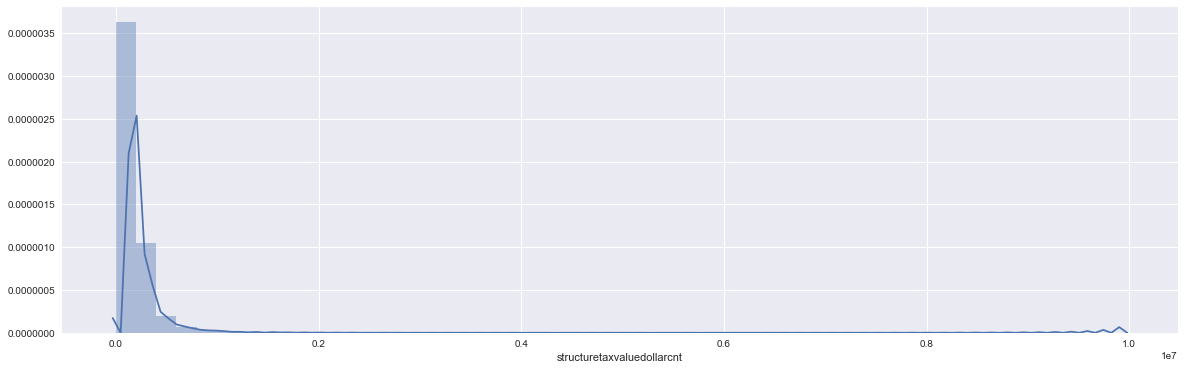

In [14]:
#Since the values are distributed we plot the distributed plot to get a better picture of the distribution
plt.figure(figsize=(20, 6))
sns.distplot(merged_data['structuretaxvaluedollarcnt'].dropna());
#Save the plot in Output folder
plt.savefig("Output/Skewness.png")
plt.show()

In [15]:
#The plot is not a normally distributed curve but is right skewed
#skewness and kurtosis
print("Skewness: %f" % merged_data['structuretaxvaluedollarcnt'].skew())
print("Kurtosis: %f" % merged_data['structuretaxvaluedollarcnt'].kurt())

Skewness: 9.018899
Kurtosis: 194.816771


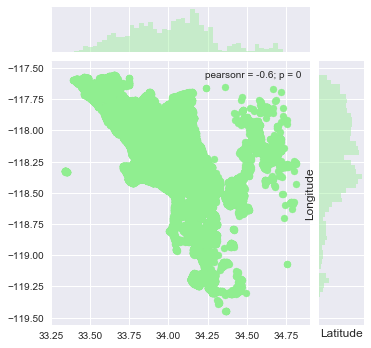

In [16]:
#Plotting the observations according to their latitude and longitude
#Nonrmalizing the data for latitude and longitude
lo =np.array(merged_data['longitude']/1000000)
la=np.array(merged_data['latitude']/1000000)
plt.figure(figsize=(100,100))
sns.jointplot(x=la, y=lo, size=5,color='lightgreen')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
#Save the plot in Output folder
plt.savefig('Output/ObservationsMap.png',dip=100)
plt.show()

In [17]:
#Save this dataframe into a CSV to implement Machine Learning Algorithms
merged_data.to_csv("Data/InputForMachineLearning.csv")